In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

In [8]:
def loaddata(file,delimiter):
    data = np.loadtxt(file,delimiter = delimiter)
    print('Dimensions',data.shape)
    print(data[1:6,:])
    return data

In [22]:
def plotData(data, label_x, label_y, label_pos, label_neg,axes = None):
    #获得正负样本的下标
    neg = data[:,2] == 0
    pos = data[:,2] ==1
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker = "+", c = "r", s = 60, linewidth = 2,label = label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], marker = "x",c = 'g', s = 60, label = label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon = True, fancybox = True)

In [23]:
data = loaddata('F:/machine learning/第1课/regression_based_algorithms/ML-examples/logistic_regression/data1.txt',',')

Dimensions (100, 3)
[[30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]]


In [24]:
X = np.c_[np.ones((data.shape[0],1)),data[:,0:2]]
y = np.c_[data[:,2]]

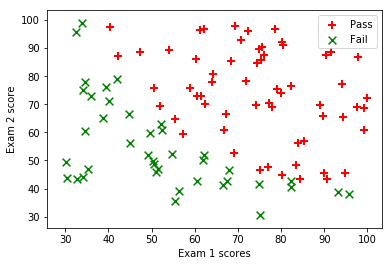

In [25]:
plotData(data, "Exam 1 scores", "Exam 2 score", "Pass", "Fail")

In [27]:
#定义sigmoid函数
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [28]:
#定义损失函数
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = -1.0*(1.0/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    if np.isnan(J[0]):
        return (np.inf)
    return J[0]

In [31]:
#求解梯度
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    grad = (1.0/m)*X.T.dot(h - y)
    return(grad.flatten())

In [39]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('cost: \n', cost)
print('grad: \n', grad)

cost: 
 0.6931471805599453
grad: 
 [ -0.1        -12.00921659 -11.26284221]


In [40]:
#最小化损失函数
res = minimize(costFunction, initial_theta, args = (X,y), jac = gradient, options = {'maxiter':400})
res

c:\users\13768\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\13768\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


      fun: 0.20349770158950986
 hess_inv: array([[ 2.85339493e+03, -2.32908823e+01, -2.27416470e+01],
       [-2.32908823e+01,  2.04489131e-01,  1.72969525e-01],
       [-2.27416470e+01,  1.72969525e-01,  1.96170322e-01]])
      jac: array([-2.68557645e-09,  4.36433470e-07, -1.39671759e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

In [41]:
def predict(theta, X, threshold = 0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return (p.astype('int'))

In [44]:
sigmoid(np.array([1,45,85]).dot(res.x.T))

0.7762903249331018

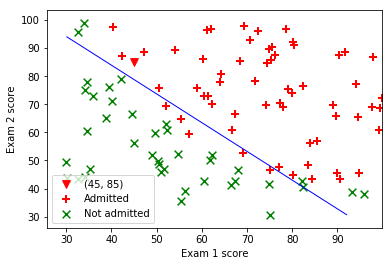

In [45]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

In [50]:
#加正则化项的逻辑回归
data2 = loaddata('F:/machine learning/第1课/regression_based_algorithms/ML-examples/logistic_regression/data2.txt',',')

Dimensions (118, 3)
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


In [51]:
#拿到X和y
X = np.c_[data2[:,2]]
y = data2[:,0:2]

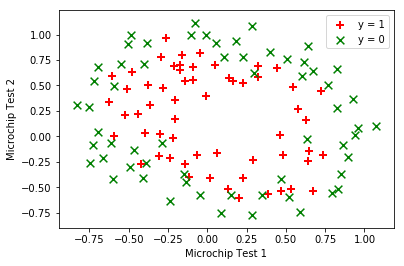

In [52]:
#画个图
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [55]:
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])
XX.shape

(118, 28)

In [56]:
# 定义损失函数
def costFunctionReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta))
    J = -1.0*(1.0/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2.0*m))*np.sum(np.square(theta[1:]))
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [57]:
def gradientReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1,1)))
    grad = (1.0/m)*XX.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)] 
    return(grad.flatten())

In [58]:
initial_theta = np.zeros(XX.shape[1])
costFunctionReg(initial_theta, 1, XX, y)

0.34657359027997264

ValueError: shapes (28,28) and (56,) not aligned: 28 (dim 1) != 56 (dim 0)

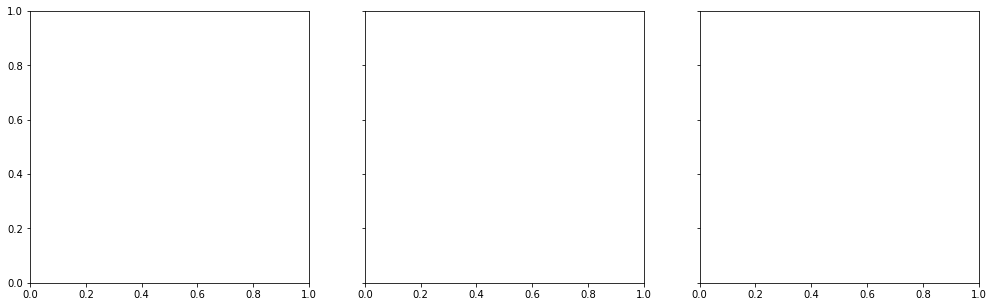

In [59]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# 决策边界，咱们分别来看看正则化系数lambda太大太小分别会出现什么情况
# Lambda = 0 : 就是没有正则化，这样的话，就过拟合咯
# Lambda = 1 : 这才是正确的打开方式
# Lambda = 100 : 卧槽，正则化项太激进，导致基本就没拟合出决策边界

for i, C in enumerate([0.0, 1.0, 100.0]):
    # 最优化 costFunctionReg
    res2 = minimize(costFunctionReg, initial_theta, args=(C, XX, y), jac=gradientReg, options={'maxiter':3000})
    
    # 准确率
    accuracy = 100.0*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # 对X,y的散列绘图
    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    # 画出决策边界
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))